In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [11]:
deliveries = pd.read_csv(r"C:\Users\LENOVO\Desktop\data\deliveries.csv")
matches    = pd.read_csv(r"C:\Users\LENOVO\Desktop\data\matches.csv")
orange     = pd.read_csv(r"C:\Users\LENOVO\Desktop\data\orange_cap.csv")
purple     = pd.read_csv(r"C:\Users\LENOVO\Desktop\data\purple_cap.csv")


In [12]:
deliveries.head(), deliveries.shape
matches.head(), matches.shape
orange.head(), orange.shape
purple.head(), purple.shape


(   Position           Bowler  Team  Matches  Innings  Balls  Overs  Maidens  \
 0         1  Prasidh Krishna    GT       15       15    354   59.0        0   
 1         2       Noor Ahmad   CSK       14       14    300   50.0        0   
 2         3   Josh Hazlewood   RCB       12       12    264   44.0        0   
 3         4      Trent Boult    MI       16       16    346   57.4        0   
 4         5   Arshdeep Singh  PBKS       17       16    350   58.2        1   
 
    Runs  Wickets Best_bowling_figure  Economy_rate  Four_wicket_haul  \
 0   488       25               4--41          8.27                 1   
 1   408       24               4--18          8.16                 2   
 2   386       22               4--33          8.77                 1   
 3   517       22               4--26          8.96                 1   
 4   518       21               3--16          8.88                 0   
 
    Five_wicket_hall  
 0                 0  
 1                 0  
 2       

In [13]:
for name, df in [('deliveries', deliveries),
                 ('matches', matches),
                 ('orange', orange),
                 ('purple', purple)]:
    print(f"\n===== {name.upper()} =====")
    print(df.info())
    print(df.isnull().sum())



===== DELIVERIES =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17183 entries, 0 to 17182
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_no          17183 non-null  int64  
 1   date              17183 non-null  object 
 2   stage             17183 non-null  object 
 3   venue             17183 non-null  object 
 4   batting_team      17183 non-null  object 
 5   bowling_team      17183 non-null  object 
 6   innings           17183 non-null  int64  
 7   over              17183 non-null  float64
 8   striker           17183 non-null  object 
 9   bowler            17183 non-null  object 
 10  runs_of_bat       17183 non-null  int64  
 11  extras            17183 non-null  int64  
 12  wide              17183 non-null  int64  
 13  legbyes           17183 non-null  int64  
 14  byes              17183 non-null  int64  
 15  noballs           17183 non-null  int64  
 16  wicket_type     

In [ ]:
#EDA Sections + Code

In [23]:
# Auto-detect winner column
winner_col = None
for col in matches.columns:
    if 'winner' in col.lower():
        winner_col = col
        break

print("Winner column =", winner_col)


Winner column = toss_winner


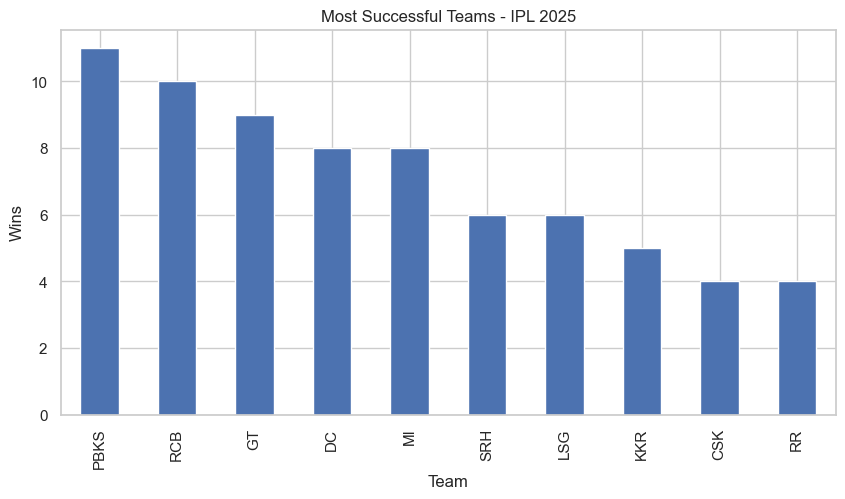

In [24]:
matches['match_winner'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Most Successful Teams - IPL 2025")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


In [25]:
toss_winner_col = None
toss_decision_col = None

for col in matches.columns:
    if 'toss' in col.lower() and 'winner' in col.lower():
        toss_winner_col = col
    if 'toss' in col.lower() and ('decision' in col.lower() or 'choice' in col.lower()):
        toss_decision_col = col

print("Toss Winner column =", toss_winner_col)
print("Toss Decision column =", toss_decision_col)


Toss Winner column = toss_winner
Toss Decision column = toss_decision


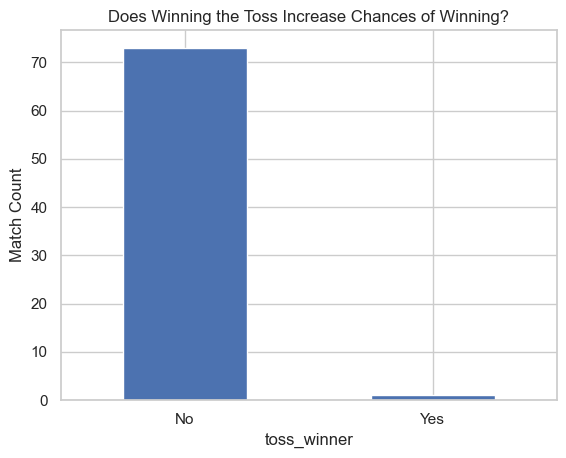

In [26]:
(matches[toss_winner_col] == matches[winner_col]).value_counts().plot(kind='bar')
plt.title("Does Winning the Toss Increase Chances of Winning?")
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel("Match Count")
plt.show()


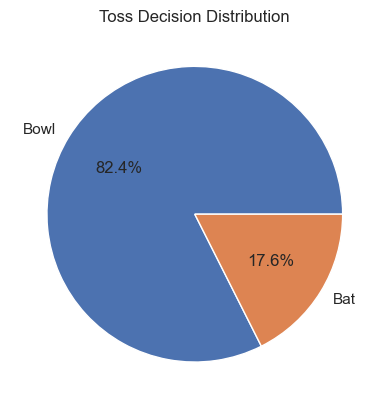

In [27]:
matches[toss_decision_col].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Toss Decision Distribution")
plt.ylabel("")
plt.show()


In [ ]:
#ORANGE CAP (Batting EDA)

In [28]:
print(orange.columns.tolist())


['Position', 'Batsman', 'Team', 'Matches', 'Innings', 'Not_out', 'Runs', 'Highest_score', 'Average', 'Balls_faced', 'Strike_rate', 'Hundreds', 'Fifties', 'Ducks', 'Fours', 'Sixes']


In [ ]:
#Top 10 Run Scorers

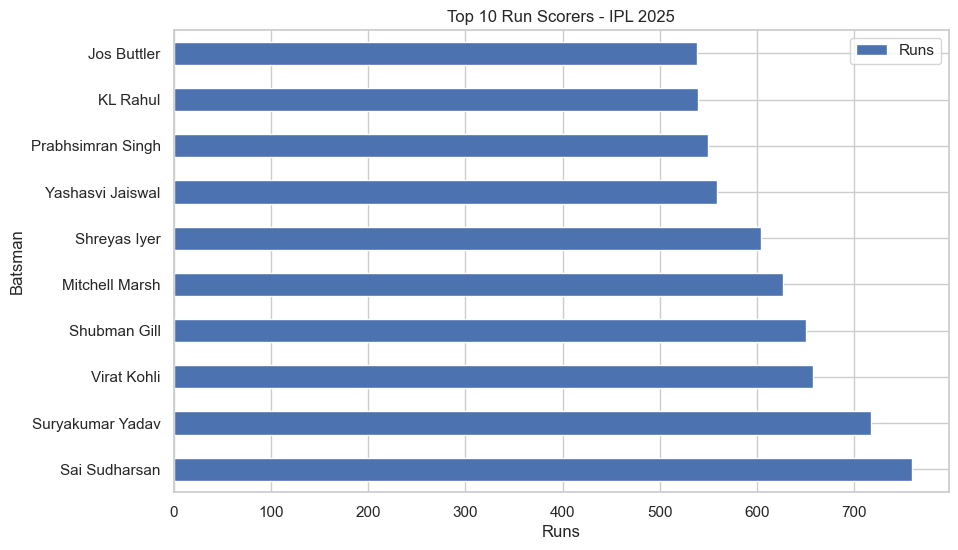

In [29]:
orange.nlargest(10, 'Runs').plot(
    x='Batsman',
    y='Runs',
    kind='barh',
    figsize=(10,6),
    title='Top 10 Run Scorers - IPL 2025'
)
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Best Strike Rates (Min 200 Runs Filter for fairness)

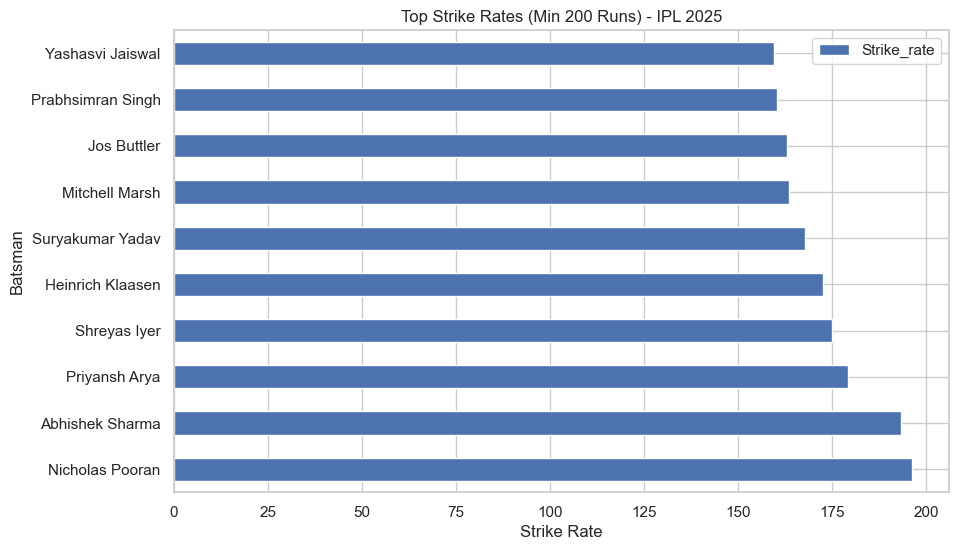

In [30]:
qualified = orange[orange['Runs'] >= 200]
qualified.nlargest(10, 'Strike_rate').plot(
    x='Batsman',
    y='Strike_rate',
    kind='barh',
    figsize=(10,6),
    title='Top Strike Rates (Min 200 Runs) - IPL 2025'
)
plt.xlabel("Strike Rate")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Scatter Plot: Strike Rate vs Runs

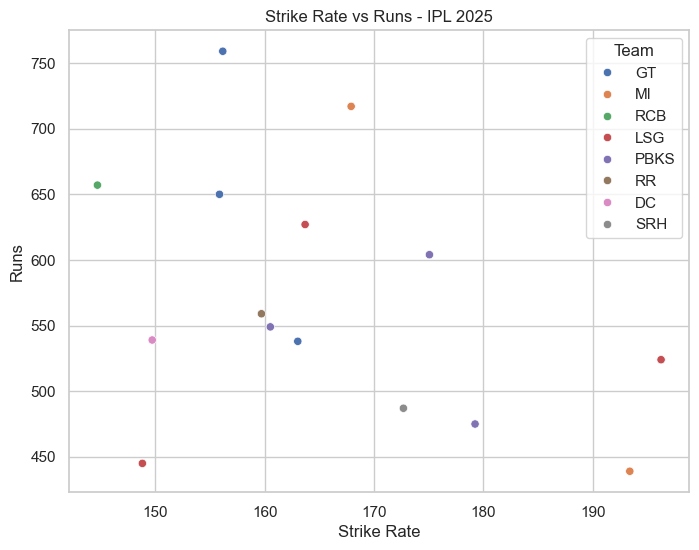

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=orange, x='Strike_rate', y='Runs', hue='Team')
plt.title("Strike Rate vs Runs - IPL 2025")
plt.xlabel("Strike Rate")
plt.ylabel("Runs")
plt.show()


In [ ]:
#Highest Averages (Min 10 Innings Filter)

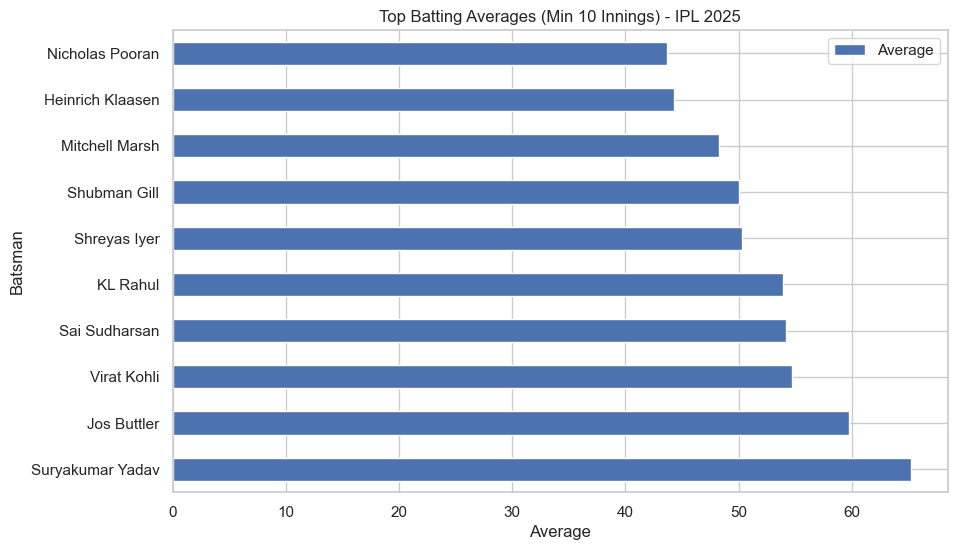

In [32]:
qualified_avg = orange[orange['Innings'] >= 10]
qualified_avg.nlargest(10, 'Average').plot(
    x='Batsman',
    y='Average',
    kind='barh',
    figsize=(10,6),
    title='Top Batting Averages (Min 10 Innings) - IPL 2025'
)
plt.xlabel("Average")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Boundary Contribution %

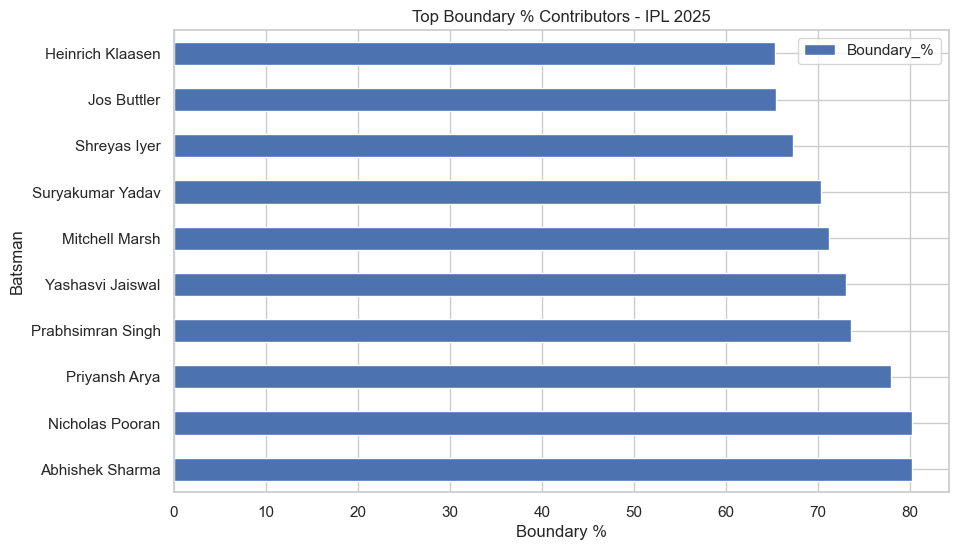

In [33]:
orange['Boundary_Runs'] = orange['Fours']*4 + orange['Sixes']*6
orange['Boundary_%'] = (orange['Boundary_Runs'] / orange['Runs']) * 100

orange.nlargest(10, 'Boundary_%').plot(
    x='Batsman',
    y='Boundary_%',
    kind='barh',
    figsize=(10,6),
    title='Top Boundary % Contributors - IPL 2025'
)
plt.xlabel("Boundary %")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Dismissal Hard to Get Out (Not Out%)

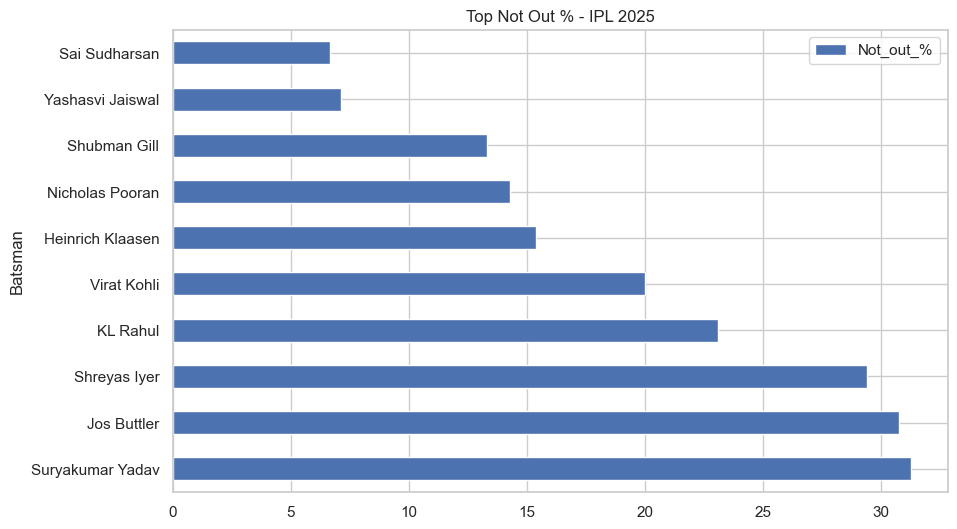

In [34]:
orange['Not_out_%'] = (orange['Not_out'] / orange['Innings']) * 100
orange.nlargest(10, 'Not_out_%').plot(
    x='Batsman',
    y='Not_out_%',
    kind='barh',
    figsize=(10,6),
    title='Top Not Out % - IPL 2025'
)
plt.show()


In [37]:
print(purple.columns.tolist())


['Position', 'Bowler', 'Team', 'Matches', 'Innings', 'Balls', 'Overs', 'Maidens', 'Runs', 'Wickets', 'Best_bowling_figure', 'Economy_rate', 'Four_wicket_haul', 'Five_wicket_hall']


In [ ]:
#Top Wicket Takers

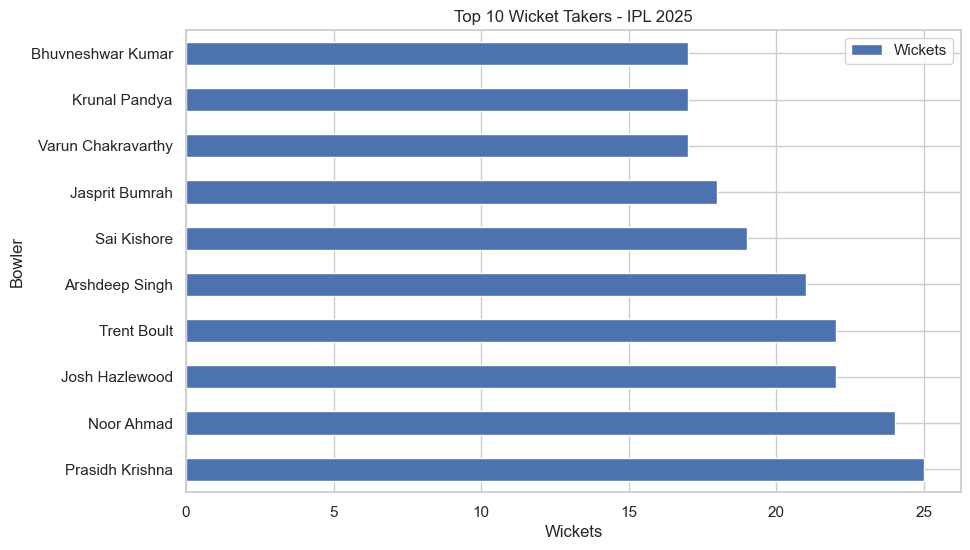

In [38]:
purple.nlargest(10, 'Wickets').plot(
    x='Bowler',
    y='Wickets',
    kind='barh',
    figsize=(10,6),
    title='Top 10 Wicket Takers - IPL 2025'
)
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


In [ ]:
#Best Economy (min 5 matches filter)

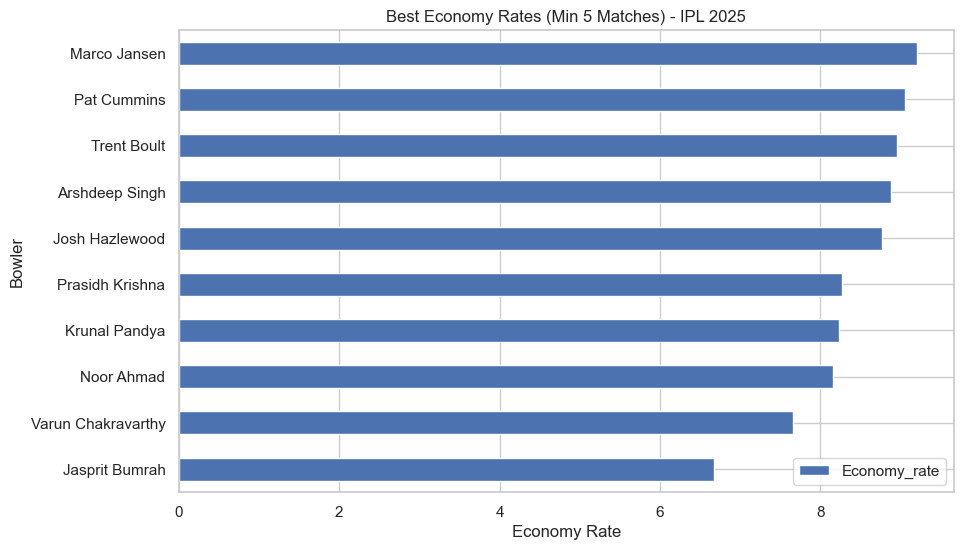

In [39]:
qualified_bowlers = purple[purple['Matches'] >= 5]
qualified_bowlers.nsmallest(10, 'Economy_rate').plot(
    x='Bowler',
    y='Economy_rate',
    kind='barh',
    figsize=(10,6),
    title='Best Economy Rates (Min 5 Matches) - IPL 2025'
)
plt.xlabel("Economy Rate")
plt.ylabel("Bowler")
plt.show()


In [ ]:
#Economy vs Wickets Scatter Plot

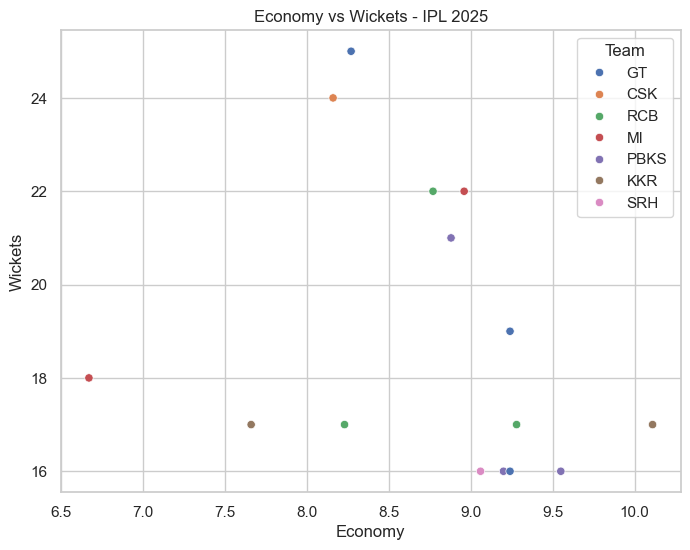

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=purple, x='Economy_rate', y='Wickets', hue='Team')
plt.title("Economy vs Wickets - IPL 2025")
plt.xlabel("Economy")
plt.ylabel("Wickets")
plt.show()


In [ ]:
#Maidens Bowled

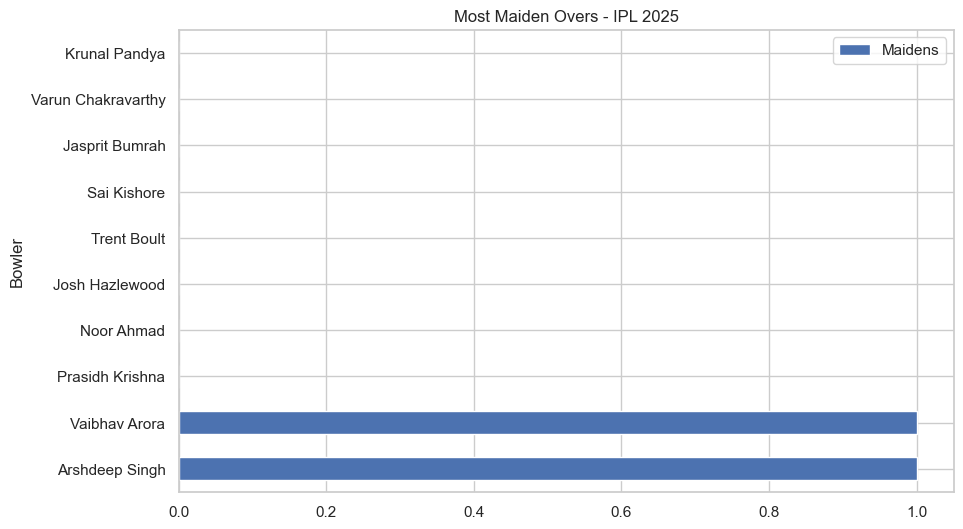

In [41]:
purple.nlargest(10, 'Maidens').plot(
    x='Bowler',
    y='Maidens',
    kind='barh',
    figsize=(10,6),
    title='Most Maiden Overs - IPL 2025'
)
plt.show()


In [ ]:
#Runs Conceded by Bowlers

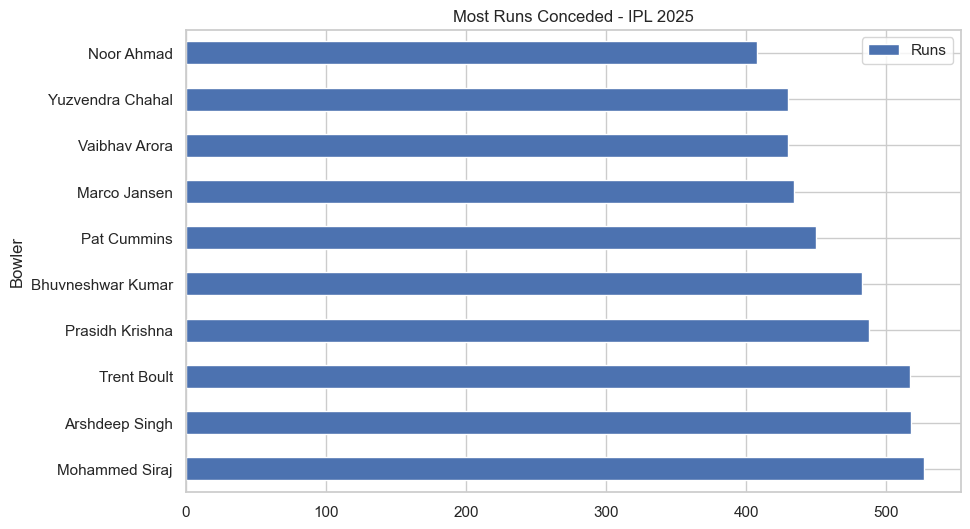

In [42]:
purple.nlargest(10, 'Runs').plot(
    x='Bowler',
    y='Runs',
    kind='barh',
    figsize=(10,6),
    title='Most Runs Conceded - IPL 2025'
)
plt.show()


In [ ]:
#Bowling Strike Rate (Derived)
#Bowling strike rate = Balls ÷ Wickets

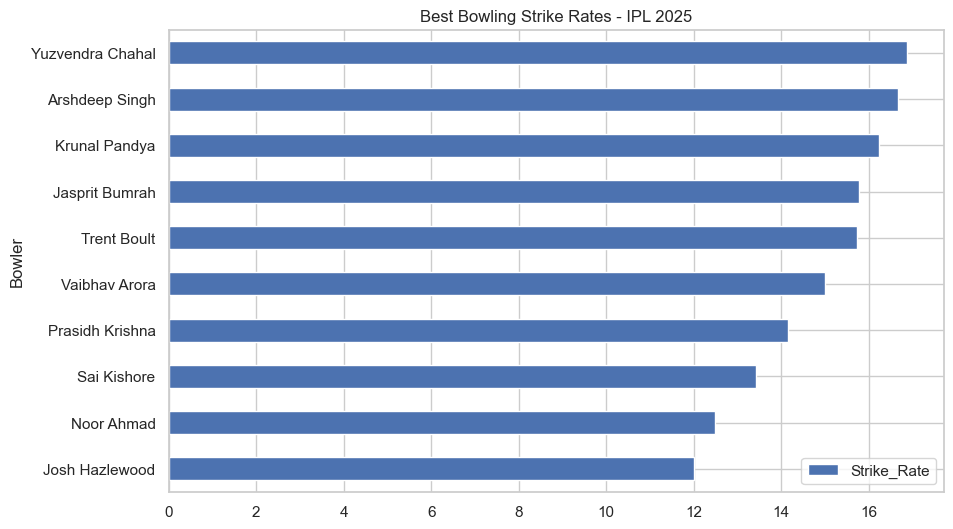

In [43]:
purple['Strike_Rate'] = purple['Balls'] / purple['Wickets']
purple.nsmallest(10, 'Strike_Rate').plot(
    x='Bowler',
    y='Strike_Rate',
    kind='barh',
    figsize=(10,6),
    title='Best Bowling Strike Rates - IPL 2025'
)
plt.show()


In [44]:
purple.nlargest(10, 'Four_wicket_haul')[['Bowler','Four_wicket_haul']]


,Bowler,Four_wicket_haul
1,Noor Ahmad,2
14,Yuzvendra Chahal,2
0,Prasidh Krishna,1
2,Josh Hazlewood,1
3,Trent Boult,1
6,Jasprit Bumrah,1
8,Krunal Pandya,1
13,Mohammed Siraj,1
4,Arshdeep Singh,0
5,Sai Kishore,0


In [45]:
purple.nlargest(10, 'Five_wicket_hall')[['Bowler','Five_wicket_hall']]


,Bowler,Five_wicket_hall
0,Prasidh Krishna,0
1,Noor Ahmad,0
2,Josh Hazlewood,0
3,Trent Boult,0
4,Arshdeep Singh,0
5,Sai Kishore,0
6,Jasprit Bumrah,0
7,Varun Chakravarthy,0
8,Krunal Pandya,0
9,Bhuvneshwar Kumar,0


In [46]:
matches.columns.tolist()


['match_id',
 'date',
 'venue',
 'team1',
 'team2',
 'stage',
 'toss_winner',
 'toss_decision',
 'first_ings_score',
 'first_ings_wkts',
 'second_ings_score',
 'second_ings_wkts',
 'match_result',
 'match_winner',
 'wb_runs',
 'wb_wickets',
 'balls_left',
 'player_of_the_match',
 'top_scorer',
 'highscore',
 'best_bowling',
 'best_bowling_figure']

In [ ]:
#MATCHES EDA

In [ ]:
#Most Match Wins

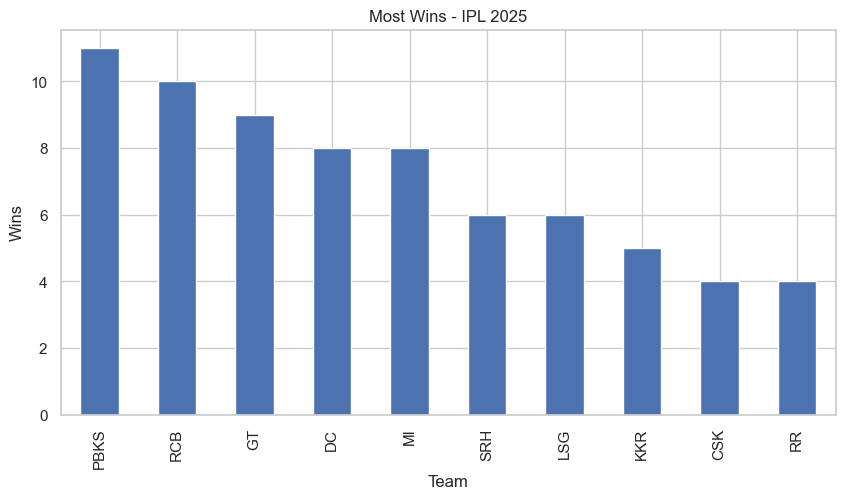

In [47]:
matches['match_winner'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Most Wins - IPL 2025")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.show()


In [ ]:
#Toss Impact: Toss Winner vs Match Winner

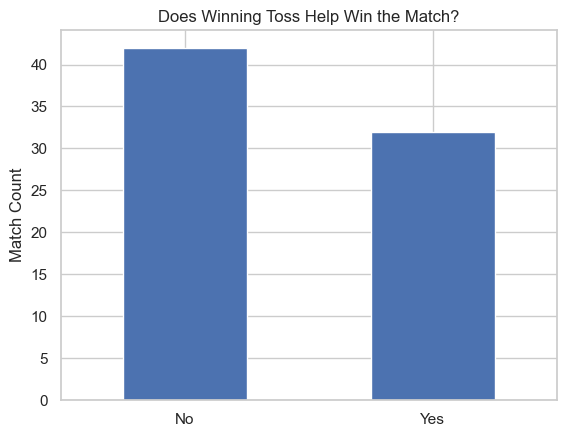

In [48]:
(matches['toss_winner'] == matches['match_winner']).value_counts().plot(kind='bar')
plt.title("Does Winning Toss Help Win the Match?")
plt.xticks([0,1], ['No','Yes'], rotation=0)
plt.ylabel("Match Count")
plt.show()


In [ ]:
#Toss Decision Distribution

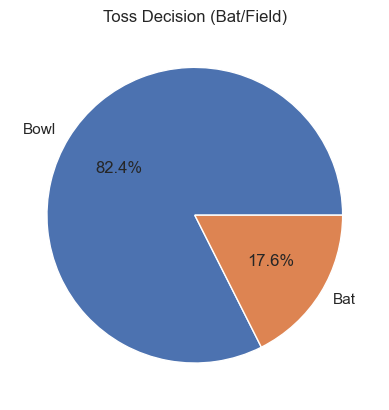

In [49]:
matches['toss_decision'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Toss Decision (Bat/Field)")
plt.ylabel("")
plt.show()


In [ ]:
#Player of the Match (Top 10)

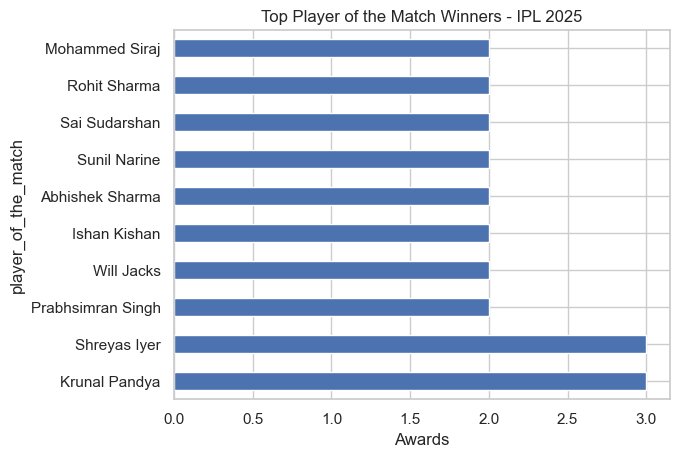

In [50]:
matches['player_of_the_match'].value_counts().head(10).plot(kind='barh')
plt.title("Top Player of the Match Winners - IPL 2025")
plt.xlabel("Awards")
plt.show()


In [ ]:
#Venues by Number of Matches

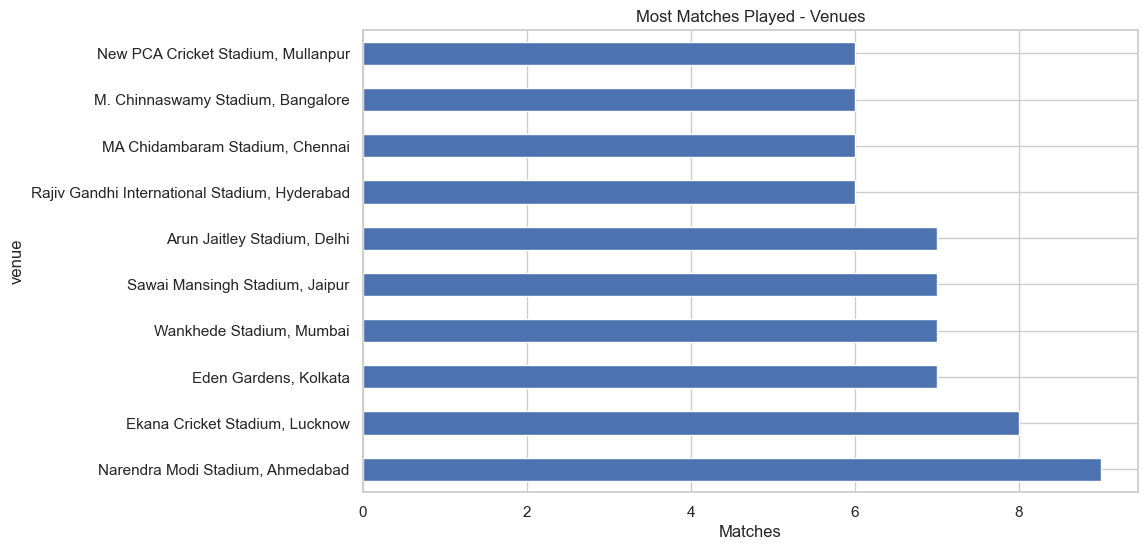

In [51]:
matches['venue'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title("Most Matches Played - Venues")
plt.xlabel("Matches")
plt.show()


In [ ]:
#DELIVERIES EDA

In [ ]:
#Top Run Scorers (From deliveries)

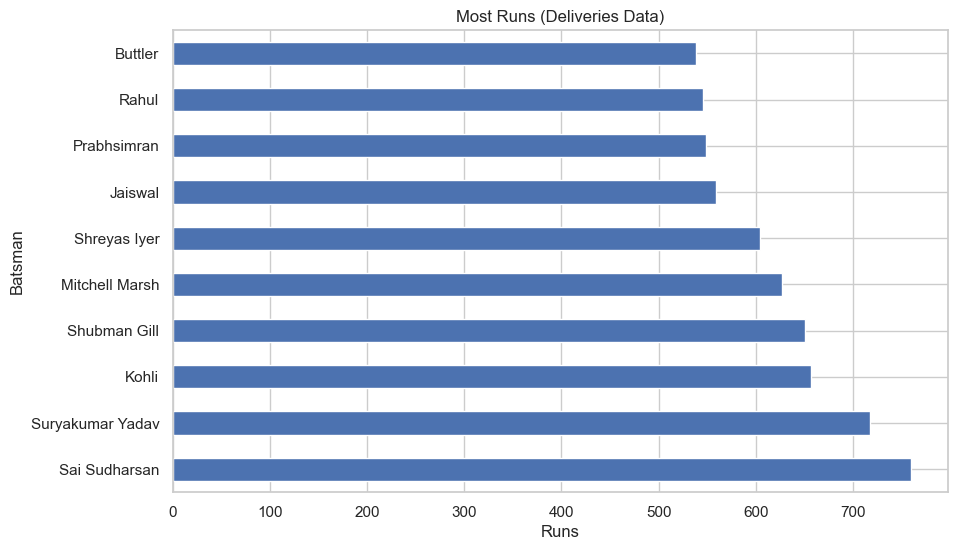

In [56]:
top_batters = deliveries.groupby('striker')['runs_of_bat'].sum().nlargest(10)
top_batters.plot(kind='barh', figsize=(10,6), title='Most Runs (Deliveries Data)')
plt.xlabel("Runs")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Most Boundary Hitters (4s + 6s)

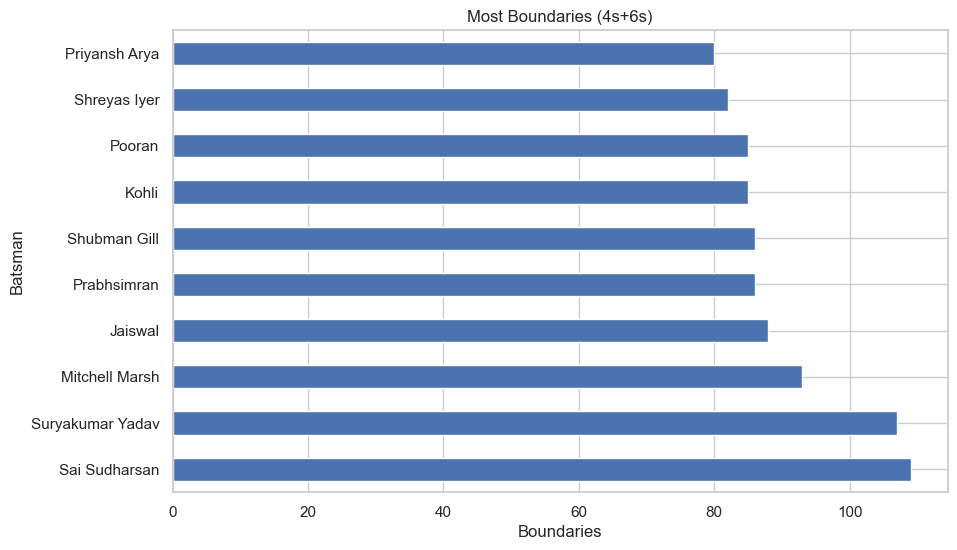

In [57]:
boundary_df = deliveries[deliveries['runs_of_bat'].isin([4,6])]
top_boundaries = boundary_df.groupby('striker')['runs_of_bat'].count().nlargest(10)
top_boundaries.plot(kind='barh', figsize=(10,6), title='Most Boundaries (4s+6s)')
plt.xlabel("Boundaries")
plt.ylabel("Batsman")
plt.show()


In [ ]:
#Team Boundary Distribution

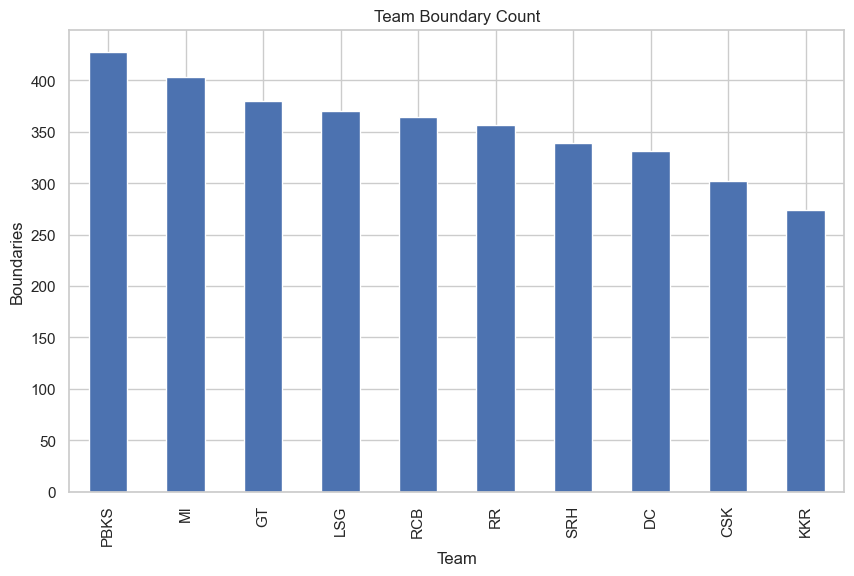

In [58]:
boundary_team = boundary_df.groupby('batting_team')['runs_of_bat'].count().sort_values(ascending=False)
boundary_team.plot(kind='bar', figsize=(10,6), title='Team Boundary Count')
plt.xlabel("Team")
plt.ylabel("Boundaries")
plt.show()


In [ ]:
#Wickets by Dismissal Type

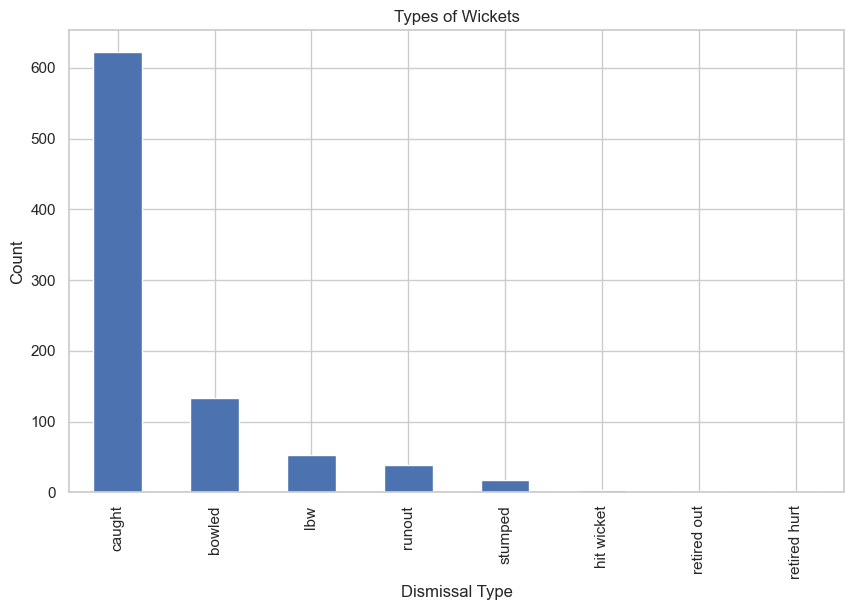

In [59]:
deliveries['wicket_type'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title("Types of Wickets")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.show()


In [ ]:
#Top Wicket Takers (from deliveries)

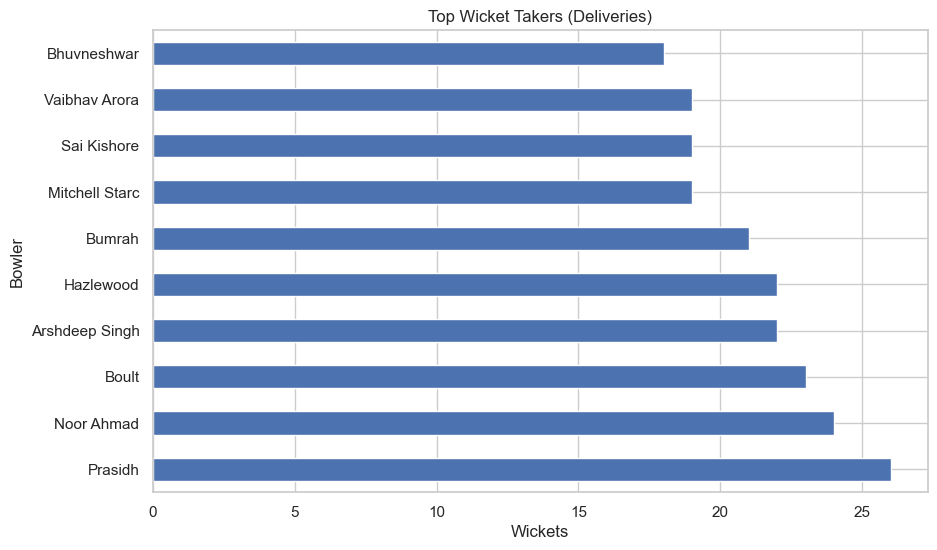

In [60]:
#We will treat any non-null player_dismissed as a wicket except run out needs special care.

# Filter genuine bowler wickets (exclude run-outs)
bowler_wickets = deliveries[deliveries['wicket_type'].notna() & (deliveries['wicket_type'] != 'run out')]
top_bowlers = bowler_wickets.groupby('bowler')['wicket_type'].count().nlargest(10)

top_bowlers.plot(kind='barh', figsize=(10,6), title='Top Wicket Takers (Deliveries)')
plt.xlabel("Wickets")
plt.ylabel("Bowler")
plt.show()


In [ ]:
#Extras Breakdown

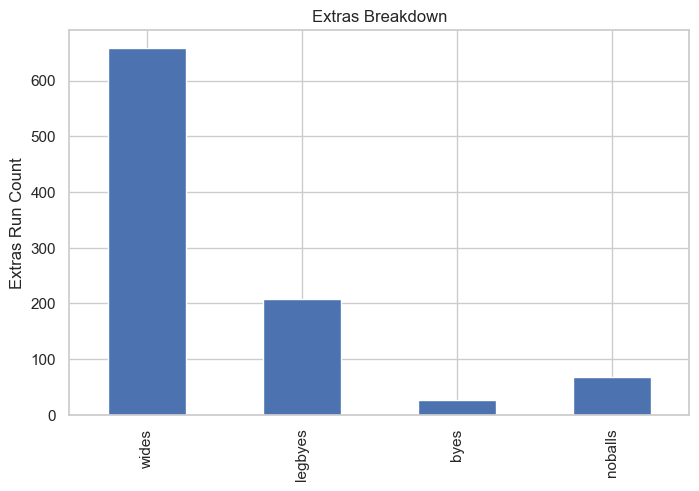

In [61]:
extras_breakdown = {
    'wides': deliveries['wide'].sum(),
    'legbyes': deliveries['legbyes'].sum(),
    'byes': deliveries['byes'].sum(),
    'noballs': deliveries['noballs'].sum()
}

pd.Series(extras_breakdown).plot(kind='bar', figsize=(8,5), title='Extras Breakdown')
plt.ylabel("Extras Run Count")
plt.show()


In [ ]:
#Venue-Level Analysis

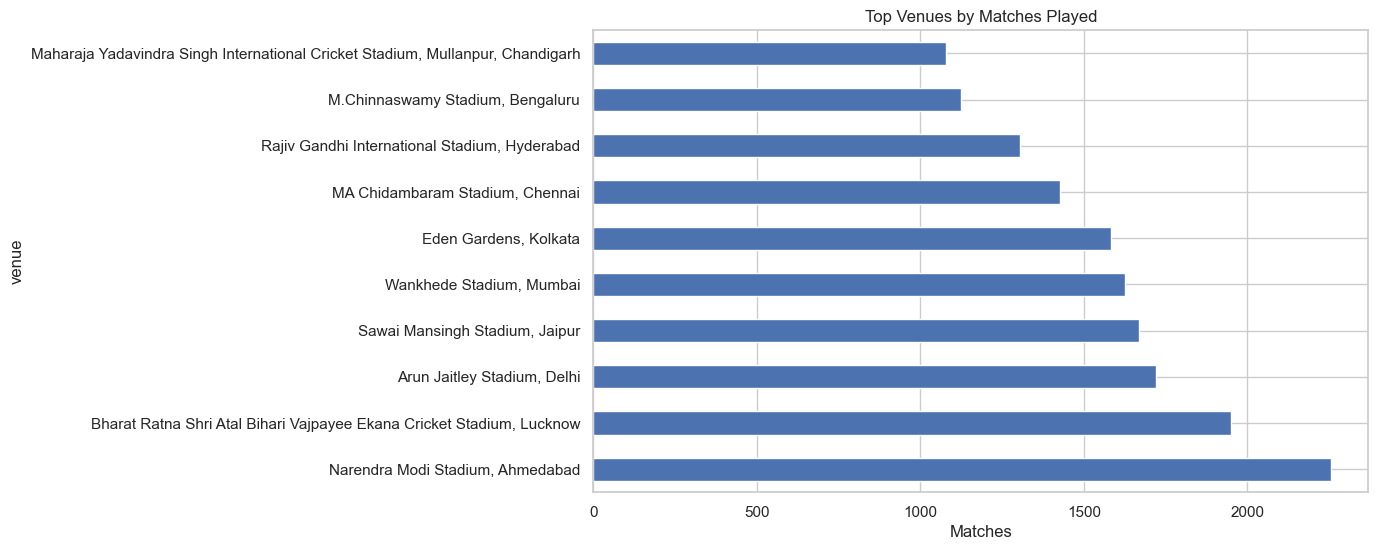

In [62]:
deliveries['venue'].value_counts().head(10).plot(kind='barh', figsize=(10,6))
plt.title("Top Venues by Matches Played")
plt.xlabel("Matches")
plt.show()


In [ ]:
#venues for batting-friendly conditions (avg runs/over):

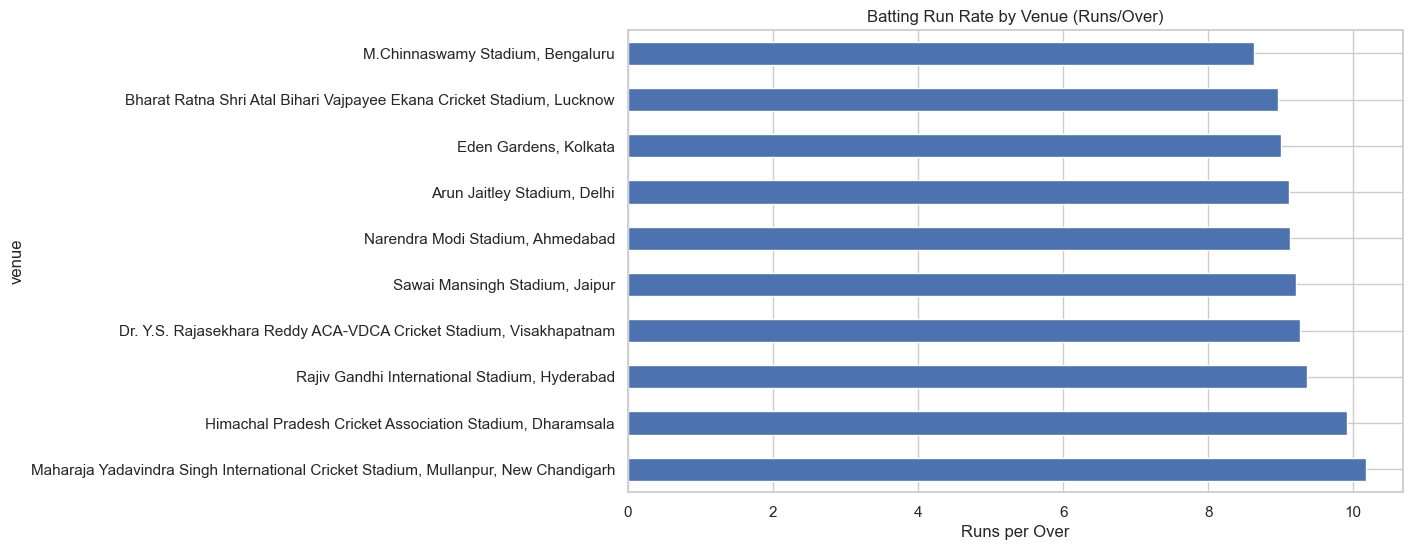

In [63]:
venue_runs = deliveries.groupby('venue')['runs_of_bat'].sum()
venue_overs = deliveries.groupby('venue')['over'].count() / 6
venue_run_rate = (venue_runs / venue_overs).sort_values(ascending=False).head(10)

venue_run_rate.plot(kind='barh', figsize=(10,6), title='Batting Run Rate by Venue (Runs/Over)')
plt.xlabel("Runs per Over")
plt.show()


In [ ]:
#Stage-Level Match Pressure

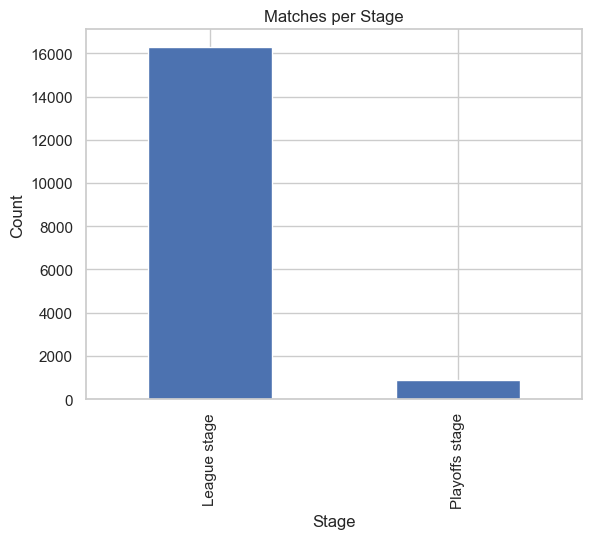

In [64]:
deliveries['stage'].value_counts().plot(kind='bar', title='Matches per Stage')
plt.xlabel("Stage")
plt.ylabel("Count")
plt.show()
